<a href="https://colab.research.google.com/github/Dukedanidd/Python-ML/blob/main/Prediccion_Forex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance


Datos cargados para EURUSD=X
Período: 2016-1-1 hasta 2024-11-09
Total de registros: 2308


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_33 (GRU)                         │ (None, 60, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_34 (GRU)                         │ (None, 60, 50)              │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_35 (GRU)                         │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,601 (150.79 KB)

 Trainable params: 38,601 (150.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - loss: 0.0722 - val_loss: 5.3278e-04
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - loss: 0.0056 - val_loss: 4.9158e-04
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - loss: 0.0046 - val_loss: 5.9763e-04
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - loss: 0.0042 - val_loss: 5.0425e-04
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - loss: 0.0039 - val_loss: 5.3668e-04
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - loss: 0.0042 - val_loss: 4.6087e-04
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0032 - val_loss: 4.2630e-04
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - loss: 0.0032 - val_loss: 4.9217e-04
Epoch 9/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - loss: 0.0031 - val_loss: 4.0481e-04
Epoch 10/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - loss: 0.0033 - val_loss: 3.6342e-04
Epoch 11/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 0.0030 - val_loss: 3.8071e-04
Epo

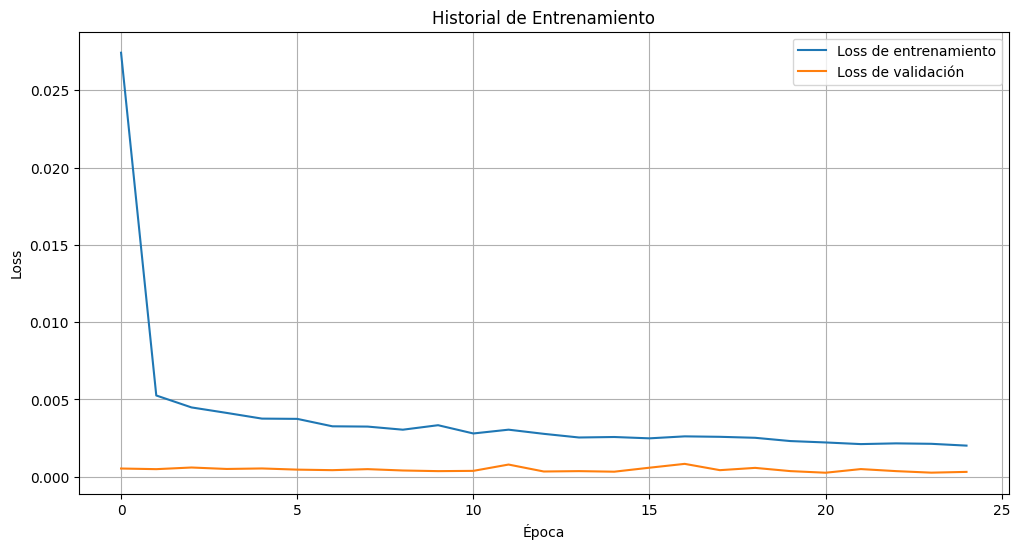

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


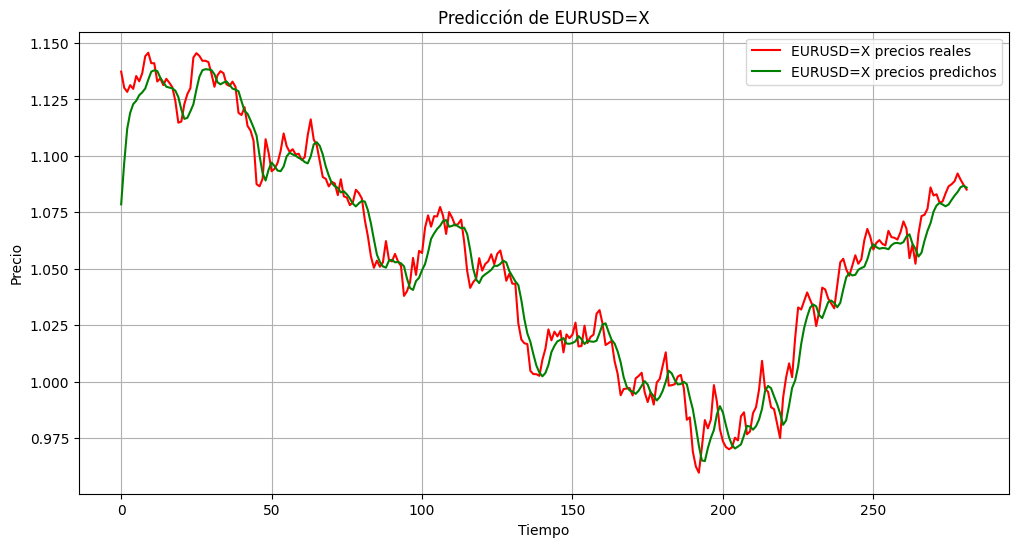


Rentabilidad total: -6.34%

Predicciones para los próximos 5 días:
Día 1: 1.0785
Día 2: 1.0770
Día 3: 1.0759
Día 4: 1.0748
Día 5: 1.0737


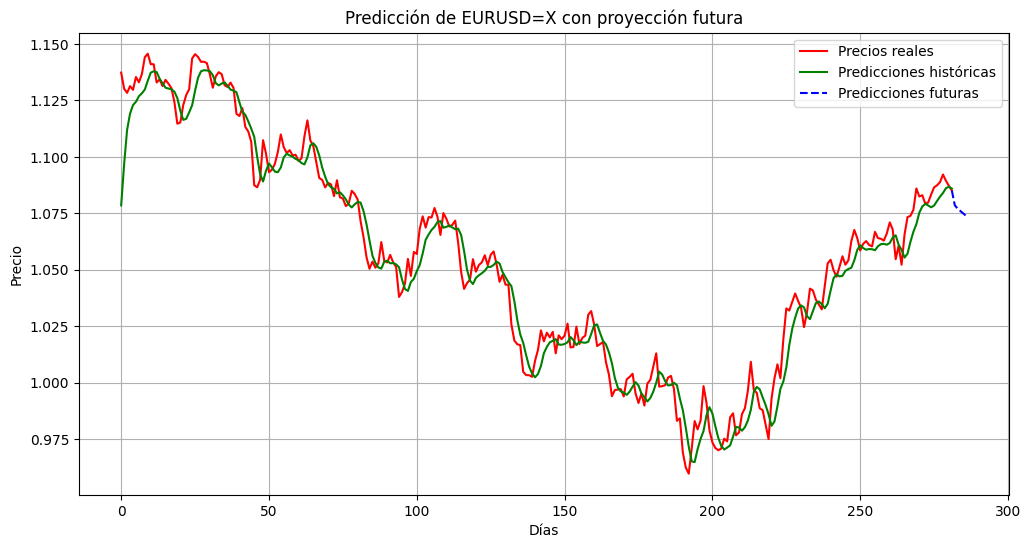

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dropout, GRU, Dense
from datetime import datetime, timedelta
import os

class ForexPredictor:
    def __init__(self, par_divisas='EURUSD=X', prediction_days=60):
        """
        Inicializa el predictor de Forex.

        Parámetros:
        par_divisas: str - Par de divisas a predecir (ej: 'EURUSD=X')
        prediction_days: int - Número de días para entrenar
        """
        self.par_divisas = par_divisas
        self.prediction_days = prediction_days
        self.model = None
        self.scaler = MinMaxScaler(feature_range=(0,1))
        self.hist = None

    def cargar_datos(self, start_date='2016-1-1', end_date=None):
        """
        Carga los datos históricos del par de divisas.

        Parámetros:
        start_date: str - Fecha de inicio en formato 'YYYY-MM-DD'
        end_date: str - Fecha final en formato 'YYYY-MM-DD' (por defecto es hoy)

        Retorna:
        DataFrame - Datos históricos del par de divisas
        """
        if end_date is None:
            end_date = datetime.now().strftime('%Y-%m-%d')

        try:
            ticker = yf.Ticker(self.par_divisas)
            self.hist = ticker.history(start=start_date, end=end_date)
            if self.hist.empty:
                raise ValueError(f"No se encontraron datos para {self.par_divisas}")

            print(f"Datos cargados para {self.par_divisas}")
            print(f"Período: {start_date} hasta {end_date}")
            print(f"Total de registros: {len(self.hist)}")
            return self.hist
        except Exception as e:
            print(f"Error al cargar datos: {str(e)}")
            return None

    def preparar_datos(self):
        """
        Prepara los datos para el entrenamiento.

        Retorna:
        tuple - (x_train, y_train) datos preparados para entrenamiento
        """
        if self.hist is None:
            raise ValueError("Primero debe cargar los datos usando cargar_datos()")

        try:
            # Escalar los datos
            scaled_data = self.scaler.fit_transform(self.hist['Close'].values.reshape(-1,1))

            x_train = []
            y_train = []

            for x in range(self.prediction_days, len(scaled_data)):
                x_train.append(scaled_data[x-self.prediction_days:x, 0])
                y_train.append(scaled_data[x, 0])

            x_train, y_train = np.array(x_train), np.array(y_train)
            x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

            return x_train, y_train
        except Exception as e:
            print(f"Error al preparar datos: {str(e)}")
            return None, None

    def crear_modelo(self, units=50, dropout_rate=0.2):
        """
        Crea y compila el modelo GRU.

        Parámetros:
        units: int - Número de unidades en cada capa GRU
        dropout_rate: float - Tasa de dropout para regularización

        Retorna:
        Model - Modelo compilado de Keras
        """
        try:
            model = Sequential([
                GRU(units=units, return_sequences=True,
                    input_shape=(self.prediction_days, 1)),
                Dropout(dropout_rate),
                GRU(units=units, return_sequences=True),
                Dropout(dropout_rate),
                GRU(units=units),
                Dropout(dropout_rate),
                Dense(units=1)
            ])

            model.compile(optimizer='adam', loss='mean_squared_error')
            self.model = model
            model.summary()
            return model
        except Exception as e:
            print(f"Error al crear modelo: {str(e)}")
            return None

    def entrenar_modelo(self, x_train, y_train, epochs=100, batch_size=32, validation_split=0.1):
        """
        Entrena el modelo con los datos preparados.

        Parámetros:
        x_train: array - Datos de entrenamiento X
        y_train: array - Datos de entrenamiento Y
        epochs: int - Número de épocas de entrenamiento
        batch_size: int - Tamaño del batch
        validation_split: float - Proporción de datos para validación

        Retorna:
        History - Historial de entrenamiento
        """
        if self.model is None:
            raise ValueError("Primero debe crear el modelo usando crear_modelo()")

        try:
            history = self.model.fit(
                x_train,
                y_train,
                epochs=epochs,
                batch_size=batch_size,
                validation_split=validation_split,
                verbose=1
            )

            # Graficar el historial de entrenamiento
            plt.figure(figsize=(12,6))
            plt.plot(history.history['loss'], label='Loss de entrenamiento')
            plt.plot(history.history['val_loss'], label='Loss de validación')
            plt.title('Historial de Entrenamiento')
            plt.xlabel('Época')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True)
            plt.show()

            return history
        except Exception as e:
            print(f"Error durante el entrenamiento: {str(e)}")
            return None

    def guardar_modelo(self, ruta='modelo_forex.h5'):
        """
        Guarda el modelo entrenado en un archivo.

        Parámetros:
        ruta: str - Ruta donde guardar el modelo
        """
        if self.model is None:
            raise ValueError("No hay modelo para guardar")
        try:
            self.model.save(ruta)
            print(f"Modelo guardado en {ruta}")
        except Exception as e:
            print(f"Error al guardar el modelo: {str(e)}")

    def cargar_modelo(self, ruta='modelo_forex.h5'):
        """
        Carga un modelo previamente guardado.

        Parámetros:
        ruta: str - Ruta del modelo a cargar
        """
        if not os.path.exists(ruta):
            raise FileNotFoundError(f"No se encontró el modelo en {ruta}")
        try:
            self.model = load_model(ruta)
            print(f"Modelo cargado desde {ruta}")
        except Exception as e:
            print(f"Error al cargar el modelo: {str(e)}")

    def predecir_precios(self, test_start='2022-1-1', test_end='2023-2-1'):
        """
        Realiza predicciones sobre datos de prueba.

        Parámetros:
        test_start: str - Fecha inicial del período de prueba
        test_end: str - Fecha final del período de prueba

        Retorna:
        tuple - (precios_reales, precios_predichos)
        """
        if self.model is None:
            raise ValueError("Primero debe crear y entrenar el modelo")

        try:
            # Cargar datos de prueba
            hist_test = yf.Ticker(self.par_divisas).history(start=test_start, end=test_end)
            actual_prices = hist_test['Close'].values

            # Preparar datos para predicción
            total_dataset = pd.concat((self.hist['Close'], hist_test['Close']), axis=0)
            model_inputs = total_dataset[len(total_dataset)-len(hist_test)-self.prediction_days:].values
            model_inputs = self.scaler.transform(model_inputs.reshape(-1,1))

            x_test = []
            for x in range(self.prediction_days, len(model_inputs)):
                x_test.append(model_inputs[x-self.prediction_days:x, 0])

            x_test = np.array(x_test)
            x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

            predicted_prices = self.model.predict(x_test)
            predicted_prices = self.scaler.inverse_transform(predicted_prices)

            return actual_prices, predicted_prices
        except Exception as e:
            print(f"Error al predecir precios: {str(e)}")
            return None, None

    def predecir_futuros_dias(self, dias=5):
        """
        Predice los precios para los próximos días especificados.

        Parámetros:
        dias: int - Número de días a predecir

        Retorna:
        list - Predicciones de precios para los días futuros
        """
        if self.model is None:
            raise ValueError("Primero debe crear y entrenar el modelo")

        try:
            # Obtener los últimos datos
            last_data = self.hist['Close'].values[-self.prediction_days:]
            future_predictions = []
            current_batch = last_data

            for _ in range(dias):
                current_batch_scaled = self.scaler.transform(current_batch.reshape(-1,1))
                current_batch_reshaped = np.reshape(current_batch_scaled,
                                                  (1, self.prediction_days, 1))

                prediction = self.model.predict(current_batch_reshaped, verbose=0)
                prediction_unscaled = self.scaler.inverse_transform(prediction)[0][0]
                future_predictions.append(prediction_unscaled)

                current_batch = np.append(current_batch[1:], prediction_unscaled)

            return future_predictions
        except Exception as e:
            print(f"Error al predecir días futuros: {str(e)}")
            return None

    def visualizar_predicciones(self, actual_prices, predicted_prices, save_path=None):
        """
        Visualiza las predicciones vs precios reales.

        Parámetros:
        actual_prices: array - Precios reales
        predicted_prices: array - Precios predichos
        save_path: str - Ruta para guardar la gráfica (opcional)
        """
        try:
            plt.figure(figsize=(12,6))
            plt.plot(actual_prices, color='red', label=f'{self.par_divisas} precios reales')
            plt.plot(predicted_prices, color='green', label=f'{self.par_divisas} precios predichos')
            plt.title(f'Predicción de {self.par_divisas}')
            plt.xlabel('Tiempo')
            plt.ylabel('Precio')
            plt.legend()
            plt.grid(True)

            if save_path:
                plt.savefig(save_path)
                print(f"Gráfica guardada en {save_path}")

            plt.show()
        except Exception as e:
            print(f"Error al visualizar predicciones: {str(e)}")

    def calcular_rentabilidad(self, actual_prices, predicted_prices):
        """
        Calcula la rentabilidad basada en las predicciones.

        Parámetros:
        actual_prices: array - Precios reales
        predicted_prices: array - Precios predichos

        Retorna:
        tuple - (rentabilidad_total, lista_de_señales)
        """
        try:
            rentabilidad = 1
            señales = []

            for i in range(1, len(actual_prices)):
                if predicted_prices[i-1] > actual_prices[i-1]:
                    # Señal de compra
                    rentabilidad_dia = actual_prices[i] / actual_prices[i-1]
                    rentabilidad *= rentabilidad_dia
                    señales.append(('COMPRA', (rentabilidad_dia-1)*100))
                else:
                    # Señal de venta
                    rentabilidad_dia = actual_prices[i-1] / actual_prices[i]
                    rentabilidad *= rentabilidad_dia
                    señales.append(('VENTA', (rentabilidad_dia-1)*100))

            return rentabilidad, señales
        except Exception as e:
            print(f"Error al calcular rentabilidad: {str(e)}")
            return None, None

def visualizar_predicciones_completas(predictor, actual_prices, predicted_prices, future_predictions):
    """
    Visualiza tanto las predicciones históricas como las futuras en una sola gráfica.

    Parámetros:
    predictor: ForexPredictor - Instancia del predictor
    actual_prices: array - Precios reales históricos
    predicted_prices: array - Precios predichos históricos
    future_predictions: array - Predicciones futuras
    """
    try:
        plt.figure(figsize=(12,6))

        # Crear array de días para el eje x
        dias_historicos = np.arange(len(actual_prices))
        dias_futuros = np.arange(len(actual_prices)-1,
                                len(actual_prices) + len(future_predictions))

        # Plotear datos históricos
        plt.plot(dias_historicos, actual_prices,
                color='red', label='Precios reales')
        plt.plot(dias_historicos, predicted_prices,
                color='green', label='Predicciones históricas')

        # Plotear predicciones futuras
        plt.plot(dias_futuros,
                np.concatenate(([actual_prices[-1]], future_predictions)),
                color='blue', linestyle='--', label='Predicciones futuras')

        plt.title(f'Predicción de {predictor.par_divisas} con proyección futura')
        plt.xlabel('Días')
        plt.ylabel('Precio')
        plt.legend()
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"Error al visualizar predicciones completas: {str(e)}")

def main():
    try:
        # Inicializar el predictor para EUR/USD
        predictor = ForexPredictor(par_divisas='EURUSD=X', prediction_days=60)

        # Cargar y preparar datos
        predictor.cargar_datos()
        x_train, y_train = predictor.preparar_datos()

        # Crear y entrenar modelo
        predictor.crear_modelo()
        predictor.entrenar_modelo(x_train, y_train)

        # Realizar predicciones históricas
        actual_prices, predicted_prices = predictor.predecir_precios()

        # Visualizar resultados
        predictor.visualizar_predicciones(actual_prices, predicted_prices)

        # Calcular rentabilidad
        rentabilidad, señales = predictor.calcular_rentabilidad(actual_prices, predicted_prices)
        print(f"\nRentabilidad total: {(rentabilidad-1)*100:.2f}%")

        # Predecir próximos 5 días
        future_predictions = predictor.predecir_futuros_dias(5)
        print("\nPredicciones para los próximos 5 días:")
        for i, pred in enumerate(future_predictions, 1):
            print(f"Día {i}: {pred:.4f}")

        # Visualizar predicciones futuras
        plt.figure(figsize=(12,6))
        dias = list(range(len(actual_prices)))

        # Corregir el cálculo de días futuros
        dias_futuros = list(range(len(actual_prices) - 1,
                                len(actual_prices) + len(future_predictions)))

        # Asegurarse de que las dimensiones coincidan
        future_data = [actual_prices[-1]] + future_predictions

        plt.plot(dias, actual_prices, color='red', label='Precios reales')
        plt.plot(dias, predicted_prices, color='green', label='Predicciones históricas')
        plt.plot(dias_futuros, future_data,
                color='blue', linestyle='--', label='Predicciones futuras')

        plt.title(f'Predicción de {predictor.par_divisas} con proyección futura')
        plt.xlabel('Días')
        plt.ylabel('Precio')
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Error en la ejecución: {str(e)}")
        # Para debugging
        print("Dimensiones:")
        print(f"dias_futuros: {len(dias_futuros)}")
        print(f"future_data: {len(future_data)}")

if __name__ == "__main__":
    main()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dropout, GRU, Dense
from datetime import datetime, timedelta
import os

In [ ]:
class ForexPredictor:
    def __init__(self, par_divisas='EURUSD=X', prediction_days=60):
        self.par_divisas = par_divisas
        self.prediction_days = prediction_days
        self.model = None
        self.scaler = MinMaxScaler(feature_range=(0,1))
        self.hist = None

    def cargar_datos(self, start_date='2016-1-1', end_date=None):
        if end_date is None:
            end_date = datetime.now().strftime('%Y-%m-%d')

        try:
            ticker = yf.Ticker(self.par_divisas)
            self.hist = ticker.history(start=start_date, end=end_date)
            if self.hist.empty:
                raise ValueError(f"No se encontraron datos para {self.par_divisas}")

            print(f"Datos cargados para {self.par_divisas}")
            print(f"Período: {start_date} hasta {end_date}")
            print(f"Total de registros: {len(self.hist)}")
            return self.hist
        except Exception as e:
            print(f"Error al cargar datos: {str(e)}")
            return None

    def preparar_datos(self):
        if self.hist is None:
            raise ValueError("Primero debe cargar los datos usando cargar_datos()")

        try:
            scaled_data = self.scaler.fit_transform(self.hist['Close'].values.reshape(-1,1))

            x_train = []
            y_train = []

            for x in range(self.prediction_days, len(scaled_data)):
                x_train.append(scaled_data[x-self.prediction_days:x, 0])
                y_train.append(scaled_data[x, 0])

            x_train, y_train = np.array(x_train), np.array(y_train)
            x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

            return x_train, y_train
        except Exception as e:
            print(f"Error al preparar datos: {str(e)}")
            return None, None

    def crear_modelo(self, units=100, dropout_rate=0.2):
        try:
            model = Sequential([
                GRU(units=units, return_sequences=True,
                    input_shape=(self.prediction_days, 1)),
                Dropout(dropout_rate),
                GRU(units=units, return_sequences=True),
                Dropout(dropout_rate),
                GRU(units=units),
                Dropout(dropout_rate),
                Dense(units=1)
            ])

            model.compile(optimizer='adam', loss='mean_squared_error')
            self.model = model
            model.summary()
            return model
        except Exception as e:
            print(f"Error al crear modelo: {str(e)}")
            return None

    def entrenar_modelo(self, x_train, y_train, epochs=100, batch_size=32, validation_split=0.1):
        if self.model is None:
            raise ValueError("Primero debe crear el modelo usando crear_modelo()")

        try:
            history = self.model.fit(
                x_train,
                y_train,
                epochs=epochs,
                batch_size=batch_size,
                validation_split=validation_split,
                verbose=1
            )

            plt.figure(figsize=(12,6))
            plt.plot(history.history['loss'], label='Loss de entrenamiento')
            plt.plot(history.history['val_loss'], label='Loss de validación')
            plt.title('Historial de Entrenamiento')
            plt.xlabel('Época')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True)
            plt.show()

            return history
        except Exception as e:
            print(f"Error durante el entrenamiento: {str(e)}")
            return None

    def predecir_precios(self, test_start='2022-1-1', test_end='2023-2-1'):
        if self.model is None:
            raise ValueError("Primero debe crear y entrenar el modelo")

        try:
            hist_test = yf.Ticker(self.par_divisas).history(start=test_start, end=test_end)
            actual_prices = hist_test['Close'].values

            total_dataset = pd.concat((self.hist['Close'], hist_test['Close']), axis=0)
            model_inputs = total_dataset[len(total_dataset)-len(hist_test)-self.prediction_days:].values
            model_inputs = self.scaler.transform(model_inputs.reshape(-1,1))

            x_test = []
            for x in range(self.prediction_days, len(model_inputs)):
                x_test.append(model_inputs[x-self.prediction_days:x, 0])

            x_test = np.array(x_test)
            x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

            predicted_prices = self.model.predict(x_test)
            predicted_prices = self.scaler.inverse_transform(predicted_prices)

            return actual_prices, predicted_prices
        except Exception as e:
            print(f"Error al predecir precios: {str(e)}")
            return None, None

    def guardar_modelo(self, ruta='modelo_forex.h5'):

        if self.model is None:
            raise ValueError("No hay modelo para guardar")
        try:
            self.model.save(ruta)
            print(f"Modelo guardado en {ruta}")
        except Exception as e:
            print(f"Error al guardar el modelo: {str(e)}")

    def cargar_modelo(self, ruta='modelo_forex.h5'):

        if not os.path.exists(ruta):
            raise FileNotFoundError(f"No se encontró el modelo en {ruta}")
        try:
            self.model = load_model(ruta)
            print(f"Modelo cargado desde {ruta}")
        except Exception as e:
            print(f"Error al cargar el modelo: {str(e)}")

    def predecir_futuros_dias(self, dias=20):
        if self.model is None:
            raise ValueError("Primero debe crear y entrenar el modelo")

        try:
            last_data = self.hist['Close'].values[-self.prediction_days:]
            future_predictions = []
            current_batch = last_data

            for _ in range(dias):
                current_batch_scaled = self.scaler.transform(current_batch.reshape(-1,1))
                current_batch_reshaped = np.reshape(current_batch_scaled,
                                                  (1, self.prediction_days, 1))

                prediction = self.model.predict(current_batch_reshaped, verbose=0)
                prediction_unscaled = self.scaler.inverse_transform(prediction)[0][0]
                future_predictions.append(prediction_unscaled)

                current_batch = np.append(current_batch[1:], prediction_unscaled)

            return future_predictions
        except Exception as e:
            print(f"Error al predecir días futuros: {str(e)}")
            return None

    def visualizar_predicciones(self, actual_prices, predicted_prices, save_path=None):
        try:
            plt.figure(figsize=(12,6))
            plt.plot(actual_prices, color='red', label=f'{self.par_divisas} precios reales')
            plt.plot(predicted_prices, color='green', label=f'{self.par_divisas} precios predichos')
            plt.title(f'Predicción de {self.par_divisas}')
            plt.xlabel('Tiempo')
            plt.ylabel('Precio')
            plt.legend()
            plt.grid(True)

            if save_path:
                plt.savefig(save_path)
                print(f"Gráfica guardada en {save_path}")

            plt.show()
        except Exception as e:
            print(f"Error al visualizar predicciones: {str(e)}")

    def calcular_rentabilidad(self, actual_prices, predicted_prices):
        try:
            rentabilidad = 1
            señales = []

            for i in range(1, len(actual_prices)):
                if predicted_prices[i-1] > actual_prices[i-1]:
                    # Señal de compra
                    rentabilidad_dia = actual_prices[i] / actual_prices[i-1]
                    rentabilidad *= rentabilidad_dia
                    señales.append(('COMPRA', (rentabilidad_dia-1)*100))
                else:
                    # Señal de venta
                    rentabilidad_dia = actual_prices[i-1] / actual_prices[i]
                    rentabilidad *= rentabilidad_dia
                    señales.append(('VENTA', (rentabilidad_dia-1)*100))

            return rentabilidad, señales
        except Exception as e:
            print(f"Error al calcular rentabilidad: {str(e)}")
            return None, None

In [ ]:
def visualizar_predicciones_completas(predictor, actual_prices, predicted_prices, future_predictions):
    try:
        plt.figure(figsize=(12,6))

        # Crear array de días para el eje x
        dias_historicos = np.arange(len(actual_prices))
        dias_futuros = np.arange(len(actual_prices)-1,
                                len(actual_prices) + len(future_predictions))

        # Plotear datos históricos
        plt.plot(dias_historicos, actual_prices,
                color='red', label='Precios reales')
        plt.plot(dias_historicos, predicted_prices,
                color='green', label='Predicciones históricas')

        # Plotear predicciones futuras
        plt.plot(dias_futuros,
                np.concatenate(([actual_prices[-1]], future_predictions)),
                color='blue', linestyle='--', label='Predicciones futuras')

        plt.title(f'Predicción de {predictor.par_divisas} con proyección futura')
        plt.xlabel('Días')
        plt.ylabel('Precio')
        plt.legend()
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"Error al visualizar predicciones completas: {str(e)}")

In [ ]:
def main():
    try:
        # Inicializar el predictor
        predictor = ForexPredictor(par_divisas='EURUSD=X', prediction_days=60)

        # Cargar y preparar datos
        print("\nCargando datos históricos...")
        predictor.cargar_datos()

        print("\nPreparando datos para entrenamiento...")
        x_train, y_train = predictor.preparar_datos()

        # Crear y entrenar modelo
        print("\nCreando modelo...")
        predictor.crear_modelo(units=100, dropout_rate=0.2)

        print("\nIniciando entrenamiento...")
        predictor.entrenar_modelo(
            x_train,
            y_train,
            epochs=100,
            batch_size=32,
            validation_split=0.1
        )

        # Guardar el modelo entrenado
        predictor.guardar_modelo('/content/modelo_forex_entrenado.h5')

        # Realizar predicciones
        actual_prices, predicted_prices = predictor.predecir_precios()

        # Visualizar resultados
        predictor.visualizar_predicciones(actual_prices, predicted_prices)

        # Calcular rentabilidad
        rentabilidad, señales = predictor.calcular_rentabilidad(actual_prices, predicted_prices)
        print(f"\Rentabilidad: {(rentabilidad-1)*100:.2f}%")

        # Predecir próximos días
        future_predictions = predictor.predecir_futuros_dias(10)
        print("\nPredicciones para los próximos 10 días:")
        for i, pred in enumerate(future_predictions, 1):
            print(f"Día {i}: {pred:.4f}")

        # Visualizar predicciones completas
        visualizar_predicciones_completas(predictor, actual_prices,
                                        predicted_prices, future_predictions)

    except Exception as e:
        print(f"Error en la ejecución: {str(e)}")
        import traceback
        print(traceback.format_exc())

if __name__ == "__main__":
    main()


Cargando datos históricos...
Datos cargados para EURUSD=X
Período: 2016-1-1 hasta 2024-11-11
Total de registros: 2308

Preparando datos para entrenamiento...

Creando modelo...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_24 (GRU)                         │ (None, 60, 100)             │          30,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_25 (GRU)                         │ (None, 60, 100)             │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_26 (GRU)                         │ (None, 100)                 │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,201 (594.54 KB)

 Trainable params: 152,201 (594.54 KB)

 Non-trainable params: 0 (0.00 B)


Iniciando entrenamiento...
Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 196ms/step - loss: 0.0630 - val_loss: 4.2406e-04
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 197ms/step - loss: 0.0031 - val_loss: 0.0013
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 174ms/step - loss: 0.0033 - val_loss: 5.4323e-04
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 189ms/step - loss: 0.0027 - val_loss: 5.9637e-04
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - loss: 0.0028 - val_loss: 4.0348e-04
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 183ms/step - loss: 0.0024 - val_loss: 6.7790e-04
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - loss: 0.0025 - val_loss: 3.5949e-04
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - loss: 0.0023 - val_loss: 3.4651e-04
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - loss: 0.0024 - val_loss: 5.3786e-04
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 174ms/step - loss: 0.0021 - val_loss: 3.7436e-04
Epoch 11/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step 

KeyboardInterrupt: 